# Breast Cancer Prediction

1) Importing the necessary Python libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None


2) Importing the dataset

In [2]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory Data Analysis

3) Data Cleaning

In [3]:
data.drop(['id'],axis = 'columns',inplace = True)

In [4]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
data.drop(['Unnamed: 32'],axis = 'columns',inplace = True)

In [7]:
data['diagnosis'].value_counts()/len(data)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [8]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

4) Variable Transformation

In [9]:
mapping = {'M':'1',
          'B':'0'}
data['diagnosis'] = data['diagnosis'].map(mapping)

In [10]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
numerical= ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst']

5) Treating the outliers

radius_mean                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
texture_mean              AxesSubplot(0.285345,0.657941;0.133621x0.222059)
perimeter_mean             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
area_mean                 AxesSubplot(0.606034,0.657941;0.133621x0.222059)
smoothness_mean           AxesSubplot(0.766379,0.657941;0.133621x0.222059)
compactness_mean             AxesSubplot(0.125,0.391471;0.133621x0.222059)
concavity_mean            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
concave points_mean        AxesSubplot(0.44569,0.391471;0.133621x0.222059)
symmetry_mean             AxesSubplot(0.606034,0.391471;0.133621x0.222059)
fractal_dimension_mean    AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

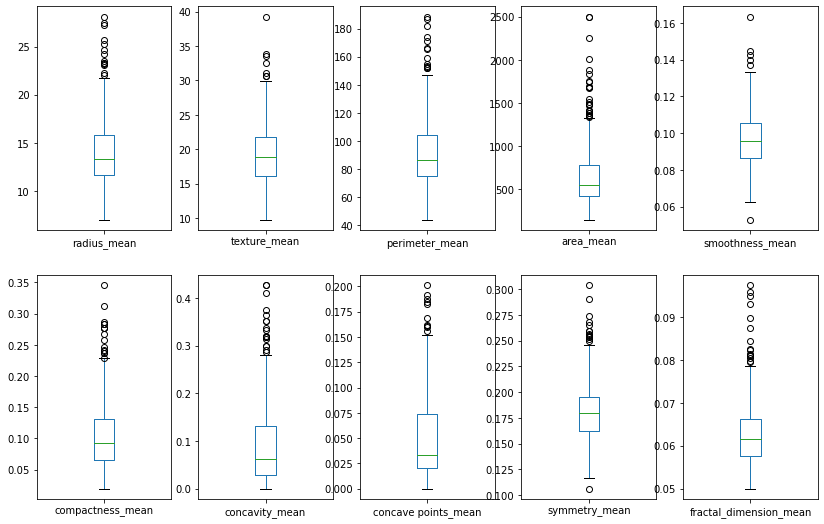

In [12]:
data[numerical[0:10]].plot(kind = 'box', subplots = True,
                            layout = (3,5),fontsize = 10,
                            figsize = (14,14))

In [13]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
x = data.drop(columns = ['diagnosis'])
y = data['diagnosis']

In [15]:
def cap_data(data):
    for col in numerical:
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.25,0.75]).values
            iqr = percentiles[1]-percentiles[0]
            upper_limit = percentiles[1] + 1.5*iqr
            lower_limit = percentiles[0] -1.5*iqr
            data[col][data[col] <= percentiles[0]] = lower_limit
            data[col][data[col] >= percentiles[1]] = upper_limit
        else:
            data[col]=data[col]
    return data


cap_data(data)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,21.90,7.725,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,27.46,8.12,187.335,1937.05,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
1,1,21.90,17.770,147.495,1326.3,0.057975,0.07864,0.08690,0.070170,0.1812,...,27.46,23.41,187.335,1937.05,0.1238,0.18660,0.2416,0.306105,0.27500,0.08902
2,1,21.90,21.250,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,27.46,25.53,187.335,1937.05,0.1444,0.62695,0.7855,0.306105,0.41915,0.08758
3,1,5.58,20.380,77.580,-123.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,14.91,26.50,98.870,567.70,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
4,1,21.90,7.725,147.495,1326.3,0.100300,0.22862,0.28241,0.154535,0.1809,...,27.46,8.12,187.335,1937.05,0.1374,0.20500,0.7855,0.306105,0.14915,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.90,30.245,147.495,1326.3,0.133695,0.11590,0.28241,0.154535,0.1726,...,27.46,26.40,187.335,1937.05,0.1410,0.21130,0.7855,0.306105,0.14915,0.04053
565,1,21.90,30.245,147.495,1326.3,0.097800,0.10340,0.28241,0.154535,0.1752,...,27.46,42.68,187.335,1937.05,0.0725,0.19220,0.3215,0.306105,0.25720,0.04053
566,1,21.90,30.245,147.495,1326.3,0.057975,0.10230,0.09251,0.053020,0.1112,...,27.46,42.68,187.335,1937.05,0.0725,0.30940,0.3403,0.141800,0.14915,0.07820
567,1,21.90,30.245,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,27.46,42.68,187.335,1937.05,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301


In [16]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,21.90,7.725,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,27.46,8.12,187.335,1937.05,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
1,1,21.90,17.770,147.495,1326.3,0.057975,0.07864,0.08690,0.070170,0.1812,...,27.46,23.41,187.335,1937.05,0.1238,0.18660,0.2416,0.306105,0.27500,0.08902
2,1,21.90,21.250,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,27.46,25.53,187.335,1937.05,0.1444,0.62695,0.7855,0.306105,0.41915,0.08758
3,1,5.58,20.380,77.580,-123.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,14.91,26.50,98.870,567.70,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
4,1,21.90,7.725,147.495,1326.3,0.100300,0.22862,0.28241,0.154535,0.1809,...,27.46,8.12,187.335,1937.05,0.1374,0.20500,0.7855,0.306105,0.14915,0.07678


radius_mean                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
texture_mean              AxesSubplot(0.285345,0.657941;0.133621x0.222059)
perimeter_mean             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
area_mean                 AxesSubplot(0.606034,0.657941;0.133621x0.222059)
smoothness_mean           AxesSubplot(0.766379,0.657941;0.133621x0.222059)
compactness_mean             AxesSubplot(0.125,0.391471;0.133621x0.222059)
concavity_mean            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
concave points_mean        AxesSubplot(0.44569,0.391471;0.133621x0.222059)
symmetry_mean             AxesSubplot(0.606034,0.391471;0.133621x0.222059)
fractal_dimension_mean    AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

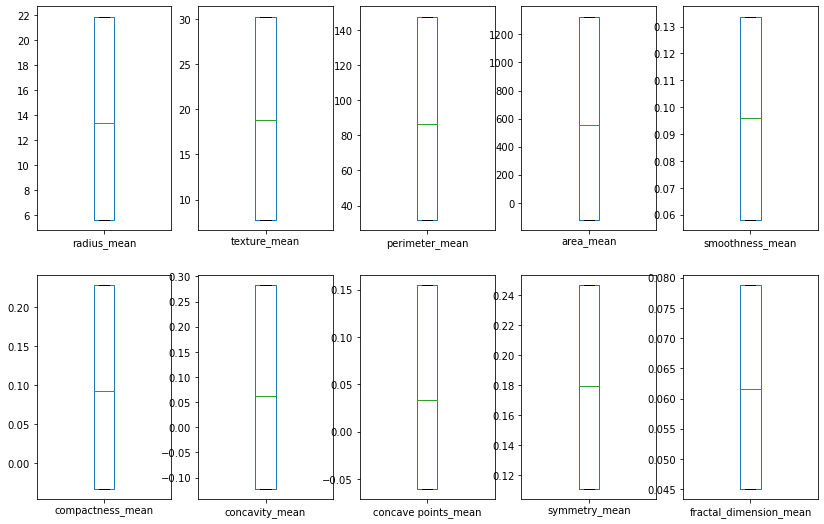

In [17]:
data[numerical[0:10]].plot(kind = 'box', subplots = True,
                            layout = (3,5),fontsize = 10,
                            figsize = (14,14))

In [18]:
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,21.90,7.725,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,27.46,8.12,187.335,1937.05,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
1,1,21.90,17.770,147.495,1326.3,0.057975,0.07864,0.08690,0.070170,0.1812,...,27.46,23.41,187.335,1937.05,0.1238,0.18660,0.2416,0.306105,0.27500,0.08902
2,1,21.90,21.250,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,27.46,25.53,187.335,1937.05,0.1444,0.62695,0.7855,0.306105,0.41915,0.08758
3,1,5.58,20.380,77.580,-123.3,0.133695,0.22862,0.28241,0.154535,0.2464,...,14.91,26.50,98.870,567.70,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
4,1,21.90,7.725,147.495,1326.3,0.100300,0.22862,0.28241,0.154535,0.1809,...,27.46,8.12,187.335,1937.05,0.1374,0.20500,0.7855,0.306105,0.14915,0.07678
5,1,12.45,7.725,82.570,477.1,0.133695,0.22862,0.28241,0.154535,0.2464,...,15.47,23.75,103.400,741.60,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
6,1,21.90,19.980,147.495,1326.3,0.094630,0.10900,0.11270,0.154535,0.1794,...,27.46,27.66,187.335,1937.05,0.1442,0.25760,0.3784,0.306105,0.30630,0.08368
7,1,13.71,20.830,90.200,577.9,0.133695,0.22862,0.09366,0.059850,0.2464,...,17.06,28.14,110.600,897.00,0.1901,0.62695,0.2678,0.155600,0.41915,0.12301
8,1,13.00,30.245,87.500,519.8,0.133695,0.22862,0.28241,0.154535,0.2464,...,15.49,42.68,106.200,739.30,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301
9,1,12.46,30.245,83.970,475.9,0.133695,0.22862,0.28241,0.154535,0.2464,...,15.09,42.68,97.650,711.40,0.1901,0.62695,0.7855,0.306105,0.41915,0.12301


In [19]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,13.61065,18.961248,88.423989,580.945694,0.095814,0.096439,0.074124,0.043252,0.178873,0.061855,...,15.516643,25.335026,102.131634,753.542707,0.131572,0.232914,0.241813,0.109499,0.283484,0.081180
std,5.85459,8.066538,41.445420,519.796264,0.027181,0.094079,0.145084,0.077048,0.048462,0.012075,...,8.280912,12.372696,59.185033,814.718262,0.042321,0.274937,0.385013,0.138424,0.096737,0.029527
min,5.58000,7.725000,31.775000,-123.300000,0.057975,-0.033300,-0.122150,-0.060225,0.111200,0.045070,...,4.340000,8.120000,22.175000,-337.750000,0.072500,-0.140650,-0.288100,-0.079775,0.149150,0.040530
25%,5.58000,7.725000,31.775000,-123.300000,0.057975,-0.033300,-0.122150,-0.060225,0.111200,0.045070,...,4.340000,8.120000,22.175000,-337.750000,0.072500,-0.140650,-0.288100,-0.079775,0.149150,0.040530
50%,13.37000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,21.90000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,0.078750,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.306105,0.419150,0.123010
max,21.90000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,0.078750,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.306105,0.419150,0.123010


In [20]:
x = data.drop(columns = ['diagnosis'])
y = data['diagnosis']

6) Scaling the data set

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

7) Treating multicollinearity

In [22]:
corr_matrix = x.corr()
corr_matrix.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323173,0.982896,0.992067,0.137031,0.464908,0.597010,0.706360,0.108623,-0.315739,...,0.943385,0.292490,0.937404,0.947188,0.134427,0.452989,0.553915,0.666462,0.163837,0.053560
texture_mean,0.323173,1.000000,0.328690,0.323070,0.029284,0.239616,0.325879,0.297461,0.066768,-0.062758,...,0.345164,0.861500,0.370817,0.348868,0.104893,0.272880,0.320420,0.303097,0.089468,0.103870
perimeter_mean,0.982896,0.328690,1.000000,0.982629,0.172396,0.505294,0.625150,0.727856,0.139681,-0.283387,...,0.943180,0.301569,0.941189,0.942625,0.170826,0.487398,0.583778,0.686937,0.186636,0.089991
area_mean,0.992067,0.323070,0.982629,1.000000,0.131460,0.463903,0.596227,0.704780,0.106643,-0.318882,...,0.943696,0.291936,0.933637,0.945788,0.132780,0.451915,0.552150,0.662491,0.158752,0.051138
smoothness_mean,0.137031,0.029284,0.172396,0.131460,1.000000,0.628149,0.492407,0.509430,0.494759,0.530776,...,0.191212,0.078186,0.225010,0.181558,0.724614,0.441747,0.392954,0.467623,0.373825,0.461202


<AxesSubplot:>

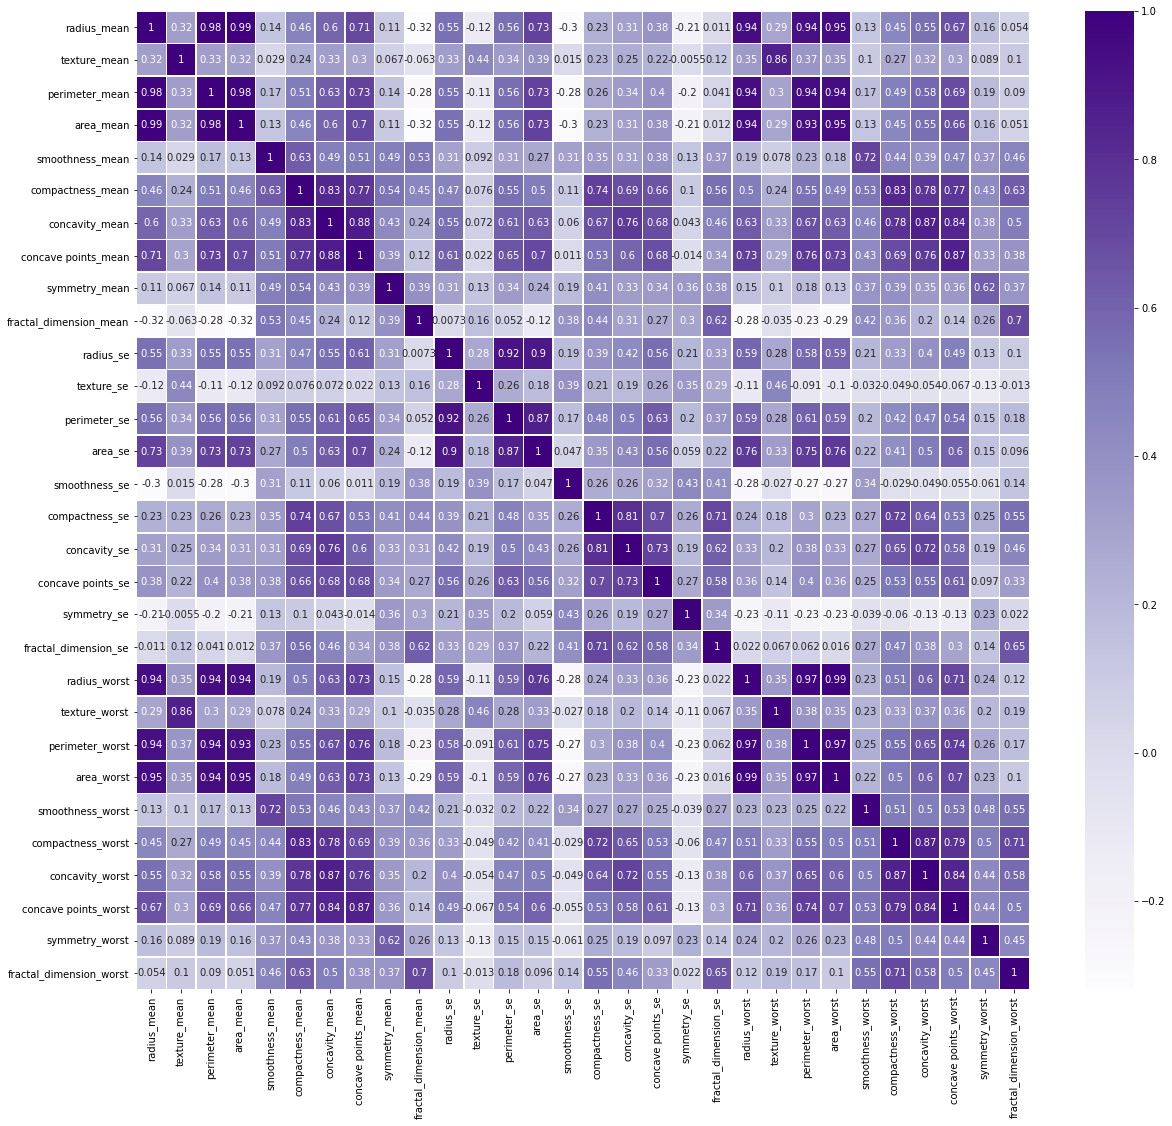

In [23]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), annot = True, linewidths = .5, cmap = 'Purples')

In [24]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = x
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],
               index = vif_data.columns)
VIF


radius_mean                331.715621
texture_mean                30.711086
perimeter_mean             214.510607
area_mean                  117.092525
smoothness_mean             50.272888
compactness_mean            15.657516
concavity_mean              13.331857
concave points_mean         11.470793
symmetry_mean               37.439662
fractal_dimension_mean      97.006020
radius_se                   20.471780
texture_se                   6.644452
perimeter_se                16.780030
area_se                     15.805668
smoothness_se                8.950256
compactness_se               9.671503
concavity_se                 8.276281
concave points_se            9.543037
symmetry_se                  9.133005
fractal_dimension_se         8.148298
radius_worst               224.500091
texture_worst               33.402518
perimeter_worst            105.985763
area_worst                  95.905683
smoothness_worst            47.698063
compactness_worst           15.424702
concavity_wo

In [25]:
VIF[VIF == VIF.max()].index[0]

'radius_mean'

# Spliting the Dataset

In [26]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train,y_test = tts(scaled_x, y, train_size = 0.7,stratify = None)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

# Classification Models

1) Logistic Regresssion

In [27]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [28]:
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [29]:
y_pred1 = classifier.predict(x_test)
predicted_proba = classifier.predict_proba(x_test)

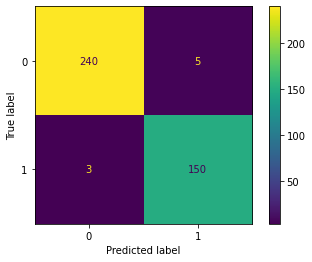

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_train,y_train)
plt.show()

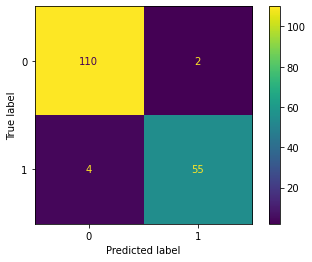

In [31]:
plot_confusion_matrix(classifier, x_test,y_test)
plt.show()

In [32]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred1)
print(k)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       112
           1       0.96      0.93      0.95        59

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [33]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points = precision_recall_curve(y_test,
                                                                        predicted_proba[:,1],pos_label ='1')
precision_points.shape,recall_points.shape,threshold_points.shape

((86,), (86,), (85,))

Precision- Recall Tradeoff

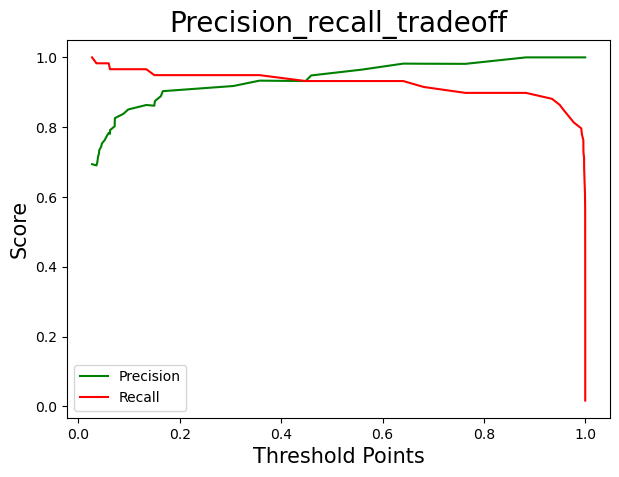

In [34]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(threshold_points,precision_points[:-1],color = 'green',label = 'Precision')
plt.plot(threshold_points, recall_points[:-1],color = 'red',label = 'Recall')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.title('Precision_recall_tradeoff',fontsize = 20)
plt.legend()

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,predicted_proba[:,-1],pos_label = '1')

Aoc - RoC CUrve

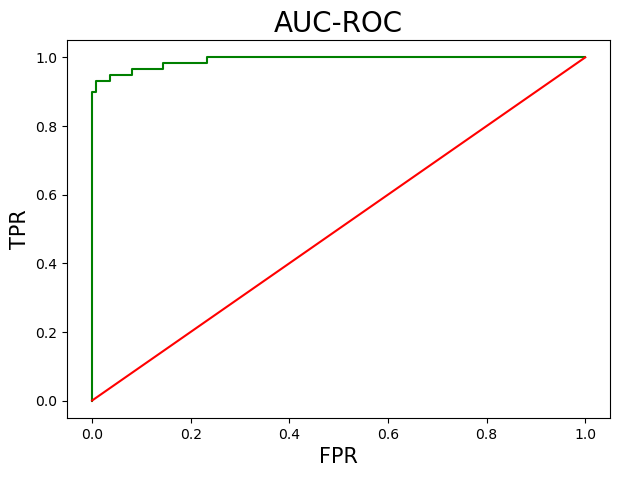

0.9913740920096852

In [36]:
plt.figure(figsize = (7,5),dpi = 100)
plt.plot(fpr,tpr, color = 'green')
plt.plot([0,1],[0,1],label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test,predicted_proba[:,1])

In [37]:
c = classifier.coef_.reshape(-1)
x = x.columns
coeff_plot = pd.DataFrame({
    'coefficients':c,
    'variables':x,
    })
#sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variables
18,-0.741155,symmetry_se
15,-0.731980,compactness_se
19,-0.724192,fractal_dimension_se
5,-0.353039,compactness_mean
8,-0.280754,symmetry_mean


Text(0.5, 1.0, 'Coefficients plot')

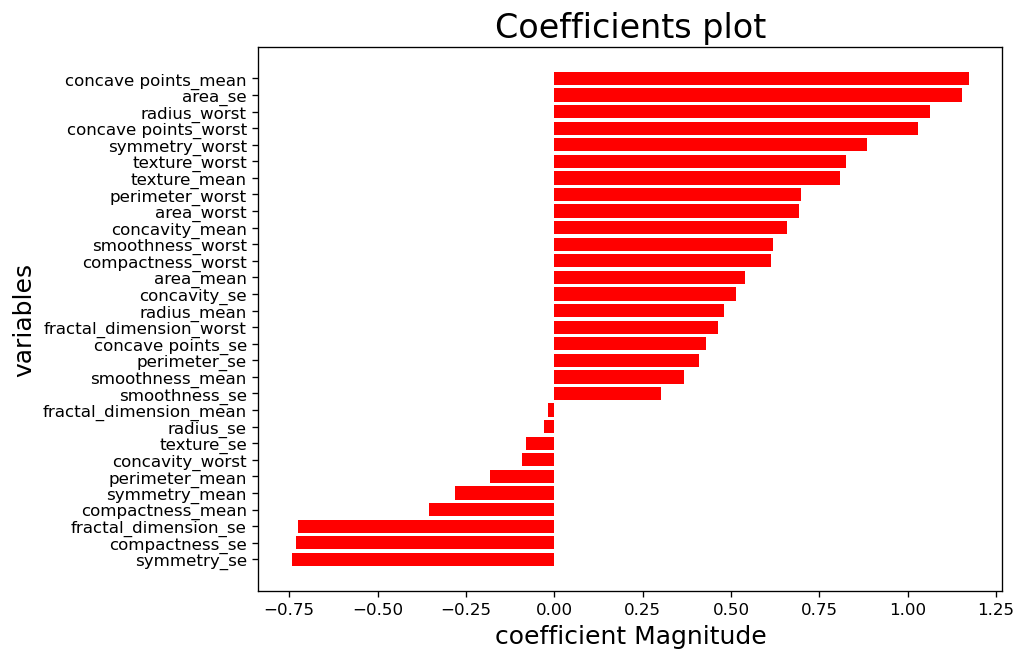

In [38]:
plt.figure(figsize = (8,6),dpi = 120)
plt.barh(coeff_plot['variables'],coeff_plot['coefficients'],color = 'red')
plt.xlabel('coefficient Magnitude',fontsize = 15)
plt.ylabel('variables',fontsize = 15)
plt.title('Coefficients plot',fontsize = 20)

2)Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)
y_pred2 = rfc.predict(x_test)

In [40]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred2)
print(k)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       112
           1       0.95      0.88      0.91        59

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



3)K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)

y_pred3 = knn.predict(x_test)

In [42]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred3)
print(k)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       112
           1       0.98      0.86      0.92        59

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



4)Support Vector Machines

In [43]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(x_train, y_train)
y_pred4 = svc_model.predict(x_test)

In [44]:
from sklearn.metrics import classification_report
k = classification_report(y_test,y_pred4)
print(k)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       112
           1       0.96      0.90      0.93        59

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



On comparing all these models it is found that the support vector machine model predicts most precisely with a recall score of (0.98,0.93)